<img width="33%" src="https://ccs-lab.github.io/images/ccs-lab-logo.png" align="right">

# Summary on the Deep Learning Study, Week 1

- Date: January 15th, 2018
- Lectures Covered
    - 수업에 사용하는 코드 https://github.com/hunkim/DeepLearningZeroToAll
    - 수업의 개요
    - 머신러닝의 개념과 용어
    - Linear Regression 의 개념
    - Linear Regression cost 함수 최소화
    - 여러 개의 입력(feature)의 Linear Regression


In [1]:
import sys
sys.version  # Current version of Python

'3.6.4 |Anaconda custom (64-bit)| (default, Dec 21 2017, 15:39:08) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
import os

# Set an environment variable TF_CPP_MIN_LOG_LEVEL as '2'.
# With the setting, you can ignore tensorflow logs except for error-level logs.
# https://stackoverflow.com/questions/35869137/avoid-tensorflow-print-on-standard-error
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Environment Setup

## Anaconda


> With over 4.5 million users, the open source Anaconda Distribution is the easiest way to do Python data science and machine learning. It includes hundreds of popular data science packages and the conda package and virtual environment manager for Windows, Linux, and MacOS. Conda makes it quick and easy to install, run, and upgrade complex data science and machine learning environments like scikit-learn, TensorFlow, and SciPy. Anaconda Distribution is the foundation of millions of data science projects as well as Amazon Web Services' Machine Learning AMIs and Anaconda for Microsoft on Azure and Windows.
>
> &mdash; [What is Anaconda? :: Anaconda](https://www.anaconda.com/what-is-anaconda/)

- [Downloads :: Anaconda](https://www.anaconda.com/download/)
- [Installation — Conda documentation](https://conda.io/docs/user-guide/install/index.html)

### Install (Windows)

Just download graphical installer and run it! :)

### Install (macOS)

#### Install with the official bash file

```bash
wget https://repo.continuum.io/archive/Anaconda3-5.0.1-MacOSX-x86_64.sh
bash Anaconda3-5.0.1-MacOSX-x86_64.sh
rm Anaconda3-5.0.1-MacOSX-x86_64.sh

# You should add the bin directory of anaconda to the PATH environment variable.
# You can do it by adding a line as below to ~/.bashrc or ~/.zshrc
#
#   export PATH=/path/to/your/anaconda/bin:$PATH
#
# The exact path of the anaconda directory can vary.
```

#### Install with Homebrew

- [Homebrew — The missing package manager for macOS](https://brew.sh/)

```bash
# If you already installed homebrew, just running this line will work!
brew cask install anaconda

# You should add the bin directory of anaconda to the PATH environment variable.
# You can do it by adding a line as below to ~/.bashrc or ~/.zshrc
#
#   export PATH=/path/to/your/anaconda/bin:$PATH
#
# The exact path of the anaconda directory can vary.
```

### Install (Linux)

```bash
wget https://repo.continuum.io/archive/Anaconda3-5.0.1-Linux-x86_64.sh
bash Anaconda3-5.0.1-Linux-x86_64.sh
rm Anaconda3-5.0.1-Linux-x86_64.sh

# You should add the bin directory of anaconda to the PATH environment variable.
# You can do it by adding a line as below to ~/.bashrc or ~/.zshrc
#
#   export PATH=/path/to/your/anaconda/bin:$PATH
#
# The exact path of the anaconda directory can vary.
```

## Conda

> Conda is an open source package management system and environment management system that runs on Windows, macOS and Linux. Conda quickly installs, runs and updates packages and their dependencies. Conda easily creates, saves, loads and switches between environments on your local computer. It was created for Python programs, but it can package and distribute software for any language.
>
> &mdash; [Conda documentation page](https://conda.io/docs/)

- [Getting started — Conda documentation](https://conda.io/docs/user-guide/getting-started.html)
- [Cheat sheet — Conda documentation](https://conda.io/docs/user-guide/cheatsheet.html)

### Update all the packages
```bash
# Update all the packages in the base environment of anaconda
conda update --all
```

### Use a virtual environment for TensorFlow

- [Managing environments — Conda documentation](https://conda.io/docs/user-guide/tasks/manage-environments.html)

```bash
# Create new environment, tf, with python 3.6 and anaconda packages
conda create -n tf python=3.6 anaconda

# Activate tf environment
source activate tf

# Install Tensorflow from PyPI
pip install tensorflow

# Deactivate tf environment
source deactivate
```

### (Optional) Use conda-forge instead of PyPI

- [conda-forge | community driven packaging for conda](https://conda-forge.org/)
- [conda-forge :: Anaconda Cloud](https://anaconda.org/conda-forge)

```bash
# Install tensorflow distributed on conda-forge
conda install -c conda-forge tensorflow
```

## Jupyter Notebook

![](http://jupyter.org/assets/jupyterpreview.png)

> The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.
>
> &mdash; [Project Jupyter | Home](http://jupyter.org/)

- [Project Jupyter | Install](http://jupyter.org/install)
- [nacyot의 프로그래밍 이야기 :: 주피터(Jupyter, IPython >= 3)의 다중 커널 개념 이해하기 - 파이썬2와 파이썬3 동시에 사용하기](http://blog.nacyot.com/articles/2015-05-08-jupyter-multiple-pythons/)
- [Jupyter notebook 이해하기](https://www.slideshare.net/dahlmoon/jupyter-notebok-20160815)

### Run

```bash
cd <working-directory>
jupyter notebook
```

## JupyterLab

![](./images/jupyter-lab.png)

> An extensible environment for interactive and reproducible computing, based on the Jupyter Notebook and Architecture.
>
> JupyterLab is the next generation user interface for Project Jupyter. It offers all the familiar building blocks of the classic Jupyter Notebook (notebook, terminal, text editor, file browser, rich outputs, etc.) in a flexible and powerful user inteface that can be extended through third party extensions that access our public APIs. Eventually, JupyterLab will replace the classic Jupyter Notebook.
>
> &mdash; [jupyterlab README](https://github.com/jupyterlab/jupyterlab)

- [jupyterlab/jupyterlab: JupyterLab computational environment.](https://github.com/jupyterlab/jupyterlab)

### Run

```bash
cd <working-directory>
jupyter lab
```

# Tensorflow

In [3]:
import tensorflow as tf
tf.__version__

/usr/local/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.4.1'

In [4]:
hello = tf.constant("Hello, Tensorflow!")

sess = tf.Session()
print(sess.run(hello))
sess.close()

b'Hello, Tensorflow!'


In [5]:
a = tf.constant(5.)
b = tf.constant(6.)
c = a * b

with tf.Session() as sess:
    print(sess.run(c))

30.0


# Datasets

- [Red Wine Quality | Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

> **Input variables (based on physicochemical tests)**: 
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

> **Output variable (based on sensory data)**:
1. quality (score between 0 and 10)

> **Relevant Papers**:
>
> - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. 
In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 

- Cf. [hunkim/KaggleZeroToAll: Kaggle problem solving](https://github.com/hunkim/KaggleZeroToAll)

In [6]:
DIM_INPUTS = 11
DIM_OUTPUTS = 1

## Read datasets

### Using NumPy

- [numpy.loadtxt — NumPy v1.13 Manual](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html)
- [numpy.genfromtxt — NumPy v1.13 Manual](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html)

In [7]:
import numpy as np

dat = np.genfromtxt('datasets/winequality-red.csv', delimiter=',', skip_header=1)

In [8]:
dat

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [9]:
dat.shape

(1599, 12)

### Using Pandas

- [pandas.read_csv — pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [10]:
import pandas as pd

dat = pd.read_csv('datasets/winequality-red.csv')

In [11]:
type(dat)

pandas.core.frame.DataFrame

In [12]:
dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
dat.values

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [14]:
dat.shape

(1599, 12)

In [15]:
dat.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Using TensorFlow

- [Importing Data  |  TensorFlow](https://www.tensorflow.org/programmers_guide/datasets)

## Make X & Y

In [16]:
X_total = dat.values[:, 0:-1]
Y_total = dat.values[:, [-1]]

## Split Training/Test datasets

### Using NumPy

In [17]:
# This way of choosing train datasets cannot make fixed rate of train-test split.
# The number of True on the mask vector is distributed around 0.8.
mask = np.random.rand(len(X_total)) < 0.8

In [18]:
X_train = X_total[mask]
Y_train = Y_total[mask]
X_test = X_total[~mask]
Y_test = Y_total[~mask]

In [19]:
# Formatted String on Python 3.6
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}\nY_test: {Y_test.shape}')

X_train: (1261, 11)
X_test: (338, 11)
Y_train: (1261, 1)
Y_test: (338, 1)


- Cf. [PyFormat: Using % and .format() for great good!](https://pyformat.info/)

### Using Pandas

In [20]:
dat_train = dat.sample(frac=0.8)
dat_test = dat.drop(dat_train.index)

In [21]:
X_train, Y_train = dat_train.values[:, 0:-1], dat_train.values[:, [-1]]
X_test, Y_test = dat_test.values[:, 0:-1], dat_test.values[:, [-1]]

In [22]:
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}\nY_test: {Y_test.shape}')

X_train: (1279, 11)
X_test: (320, 11)
Y_train: (1279, 1)
Y_test: (320, 1)


### Using Scikit-Learn

- [sklearn.model_selection.train_test_split — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_total, Y_total, test_size=0.2)

In [25]:
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}\nY_test: {Y_test.shape}')

X_train: (1279, 11)
X_test: (320, 11)
Y_train: (1279, 1)
Y_test: (320, 1)


# Linear Regression

\begin{align}
    H(X)
    &= X W + b \\
    &= \underbrace{\begin{bmatrix}
        x_{11} & \cdots & x_{1m} \\
        \vdots & \ddots & \vdots \\
        x_{n1} & \cdots & x_{nm}
    \end{bmatrix}}_{n \times m} \cdot \underbrace{\begin{bmatrix}
        w_{11} & \cdots & w_{1k} \\
        \vdots & \ddots & \vdots \\
        w_{m1} & \cdots & w_{mk}
    \end{bmatrix}}_{m \times k} + \underbrace{\begin{bmatrix}
        b_1 \\
        \vdots \\
        b_k \\
    \end{bmatrix}}_{k} \\
    &= \begin{bmatrix}
        (\sum_i x_{1i} w_{i1}) + b_1 & (\sum_i x_{1i} w_{i2}) + b_2 & \cdots & (\sum_i x_{1i} w_{ik}) + b_k \\
        (\sum_i x_{2i} w_{i1}) + b_1 & (\sum_i x_{2i} w_{i2}) + b_2 & \cdots & (\sum_i x_{2i} w_{ik}) + b_k \\
        \vdots & \vdots & \ddots & \vdots \\
        (\sum_i x_{ni} w_{i1}) + b_1 & (\sum_i x_{ni} w_{i2}) + b_2 & \cdots & (\sum_i x_{ni} w_{ik}) + b_k \\
    \end{bmatrix} \\
    &= \begin{bmatrix}
        h_{11} & h_{12} & \cdots & h_{1k} \\
        h_{21} & h_{22} & \cdots & h_{2k} \\
        \vdots & \vdots & \ddots & \vdots \\
        h_{n1} & h_{n2} & \cdots & h_{nk}
    \end{bmatrix} \\
\end{align}

where $n$ = the number of records, $m$ = the number of input variables (aka features, regressors, predictors), $k$ = the number of output variables.

## Model

In [26]:
# Input & Target
X = tf.placeholder(tf.float32, shape=[None, DIM_INPUTS], name='Input')
Y = tf.placeholder(tf.float32, shape=[None, DIM_OUTPUTS], name='Target')

# Weight & Bias
W = tf.Variable(tf.random_normal([DIM_INPUTS, DIM_OUTPUTS]), name='Weight')
b = tf.Variable(tf.random_normal([DIM_OUTPUTS]), name='Bias')

In [27]:
# Hypothesis with the linear regression model
H = tf.matmul(X, W) + b

# Cost/Loss function (Mean Squared Error)
cost = tf.reduce_mean(tf.square(H - Y))

## Optimization

In [28]:
# Gradient Descent Optimizer provided by TensorFlow
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-4)

# Train operation to minimize the cost function
train = optimizer.minimize(cost)

In [29]:
# Manually computed gradient
gradient = tf.reduce_mean((H - Y) * X) * 2

# Gradients computed by the optimizer
gvs = optimizer.compute_gradients(cost, [W])

# Apply computed gradients back to optimizer
apply_gradients = optimizer.apply_gradients(gvs)

## Start a session

In [30]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

## Train

In [31]:
costs = []
for step in range(2001):
    val_cost, _ = sess.run([cost, train], feed_dict={X: X_train, Y: Y_train})
    # val_cost, _ = sess.run([cost, apply_gradients], feed_dict={X: X_train, Y: Y_train})
    costs.append(val_cost)

In [32]:
for i in range(0, 2001, 100):
    print(f'Step {i:4d} {costs[i]:.4f}')

Step    0 4731.5576
Step  100 23.9495
Step  200 12.0473
Step  300 9.3886
Step  400 8.3725
Step  500 7.6884
Step  600 7.1054
Step  700 6.5798
Step  800 6.1007
Step  900 5.6630
Step 1000 5.2628
Step 1100 4.8969
Step 1200 4.5622
Step 1300 4.2561
Step 1400 3.9761
Step 1500 3.7200
Step 1600 3.4855
Step 1700 3.2710
Step 1800 3.0746
Step 1900 2.8949
Step 2000 2.7302


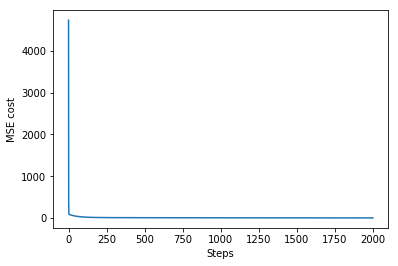

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(costs)
plt.xlabel('Steps')
plt.ylabel('MSE cost')
plt.show()

## Test

In [34]:
val_cost = sess.run([cost], feed_dict={X: X_test, Y: Y_test})
val_cost

[2.6323833]

## Close the session

In [35]:
sess.close()

# Using multiple datasets

In [36]:
filename_queue = tf.train.string_input_producer(
    ['datasets/winequality-red.csv'], shuffle=False, name='filename_queue')
reader = tf.TextLineReader(skip_header_lines=1)
key, value = reader.read(filename_queue)

record_defaults = [[0.]] * 12
xy = tf.decode_csv(value, record_defaults=record_defaults)

train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

## Abstraction with functions

- [Reading data  |  TensorFlow](https://www.tensorflow.org/api_guides/python/reading_data)
- [Importing Data  |  TensorFlow](https://www.tensorflow.org/programmers_guide/datasets)
- [Threading and Queues  |  TensorFlow](https://www.tensorflow.org/versions/r0.12/how_tos/threading_and_queues/)
- [쓰레드와 큐 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/how_tos/threading_and_queues/)

In [37]:
def read_data_format(filename_queue):
    reader = tf.TextLineReader(skip_header_lines=1)
    key, value = reader.read(filename_queue)
    
    record_defaults = [[0.]] * 12
    xy = tf.decode_csv(value, record_defaults=record_defaults)
    
    features = xy[0:-1]
    labels = xy[-1:]
    
    return features, labels

In [38]:
def input_pipeline(filenames, batch_size, num_epochs=None):
    filename_queue = tf.train.string_input_producer(
        filenames, num_epochs=num_epochs, shuffle=True)
    
    features, labels = read_data_format(filename_queue)
    
    min_after_dequeue = 10000
    capacity = min_after_dequeue + 3 * batch_size

    feature_batch, label_batch = tf.train.shuffle_batch(
        [features, labels],
        batch_size=batch_size,
        capacity=capacity,
        min_after_dequeue=min_after_dequeue)
    
    return feature_batch, label_batch

In [39]:
train_x_batch, train_y_batch = input_pipeline(['datasets/winequality-red.csv'], 100)

In [40]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [41]:
# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

costs = []
for step in range(2001):
    # Evaluate X_batch & Y_batch
    X_batch, Y_batch = sess.run([train_x_batch, train_y_batch])
    
    # Train the regression model and evaluate the cost
    _, val_cost = sess.run([train, cost], feed_dict={X: X_batch, Y: Y_batch})
    
    # Append it to the list of costs
    costs.append(val_cost)

coord.request_stop()
coord.join(threads)

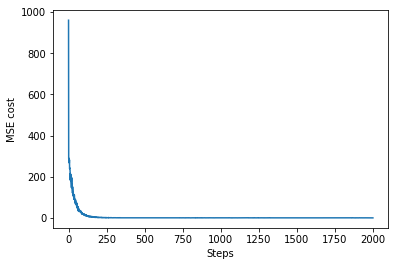

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(costs)
plt.xlabel('Steps')
plt.ylabel('MSE cost')
plt.show()

In [43]:
sess.close()

# Useful Resources

- [aicodes/tf-bestpractice: Tensorflow Best Practices](https://github.com/aicodes/tf-bestpractice)
- [aymericdamien/TensorFlow-Examples: TensorFlow Tutorial and Examples for Beginners with Latest APIs](https://github.com/aymericdamien/TensorFlow-Examples)
- [nlintz/TensorFlow-Tutorials: Simple tutorials using Google's TensorFlow Framework](https://github.com/nlintz/TensorFlow-Tutorials)
- [sjchoi86/Tensorflow-101: TensorFlow Tutorials](https://github.com/sjchoi86/Tensorflow-101): Useful tutorial for TensorFlow by Sungjoon Choi in SNU